In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.core.pylabtools import figsize
from random import sample
from random import uniform
from matplotlib import pyplot as plt

# The Monty Hall Problem

Suppose you're given the choice of three doors.  
Behind one door is a car; behind the others, goats.  
You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat.  
He then says to you, "Do you want to switch to door No. 2?"  
So, **the question is whether or not it to your advantage to switch your choice.**

### Use an experiment to make an educated guess at the probability of winning if switch my choice.

In [2]:
def monteHallSimulation():
    game_dict = {1: 'goat',
                 2: 'goat',
                 3: 'car'}
    try_list = [1, 2, 3]
    first_try = sample(try_list, 1)[0]
    if game_dict[first_try] == "car":
        # if your first try is car, you second try is always goat if you switch
        return 0 # 0 means a loss
    else:
        # if your first try is goat, since another goat will be poped, 
        # your second try is always car if you switch
        return 1 # 1 means a win    

The concept of the simulation function above goes like this:  
    
1) Create the game stage that have two goats and one car.  
    
2) For the first try, sample one option out of the three different options.  
    
3a) If the first try is a car, the host will open a door for a goat. Since you will switch your option regardless, you will eventually end up with a goat and be credited a loss.  
    
3b) If the first try is a goat, the host will open the door for the other goat. Since you will switch you option regardless, you will eventually end up with a car and be credited a win.

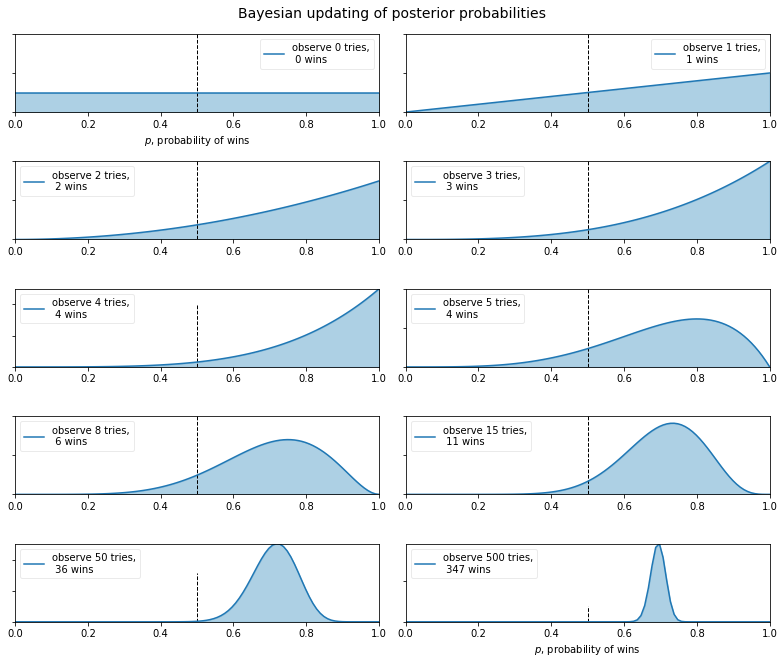

In [4]:
figsize(11, 9)

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = np.array([monteHallSimulation() for i in range(n_trials[-1])])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of wins") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    wins = data[:N].sum()
    y = dist.pdf(x, 1 + wins, 1 + N - wins)
    plt.plot(x, y, label="observe %d tries,\n %d wins" % (N, wins))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

After 500 simulations, my probability of winning a car if I keep switching doors in my second attempts is stablized to around 0.650. Therefore, my best guess is 2/3.

### Analytically calculate the probability of winning if switch doors.

For the first try, $P({car\ on\ 1st\ try}) = \frac{1}{3}$ and $P({goat\ on\ 1st\ try}) = \frac{2}{3}$.    
    
For the second try, since we switch doors, if the first try is a car, then $P({car\ on\ 2nd\ try}|{car\ on\ 1st\ try}) = 0$. If the first try is a goat, then $P({car\ on\ 2nd\ try}|{goat\ on\ 1st\ try}) = 1$.  
    
Therefore, the probability of winning if I switch doors is $\frac{1}{3} \times 0 + \frac{2}{3} \times 1 = \frac{2}{3}$